In [1]:
import pandas as pd

In [2]:
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

In [3]:
!pip install lxml

In [4]:
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN


# 종목코드 갖고 오기

In [5]:
!pip install pandas_datareader

In [6]:
import pandas_datareader as pdr

In [7]:
pdr.get_data_yahoo('005930.KS')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-10-26,25960.0,25440.0,25960.0,25840.0,7608250.0,260.791168
2015-10-27,25980.0,25620.0,25640.0,25960.0,6612050.0,262.002289
2015-10-28,26160.0,25820.0,25880.0,26160.0,13565150.0,264.020813
2015-10-29,27840.0,26480.0,26600.0,26500.0,31523550.0,267.452271
2015-10-30,27800.0,26820.0,26900.0,27440.0,25469250.0,276.939209
...,...,...,...,...,...,...
2020-10-19,60200.0,59500.0,59600.0,60000.0,14474985.0,60000.000000
2020-10-20,60900.0,60100.0,60300.0,60900.0,19326115.0,60900.000000
2020-10-21,61500.0,60600.0,61200.0,60900.0,15703443.0,60900.000000


1. 종목코드 뽑아내기
2. 종목코드 입력해서 주가 뽑아내기
3. RNN 이용해서 종목 분석

In [8]:
df_code = df.loc[:, ['종목코드']]

In [9]:
lg_c = pdr.get_data_yahoo('051910.KS')

In [1]:
lg_c = lg_c.loc[:, ['Close']]

NameError: name 'lg_c' is not defined

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(lg_c)

MinMaxScaler()

In [14]:
s_train = scaler.transform(lg_c)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
length = 30
generator = TimeseriesGenerator(s_train, s_train, length=length, batch_size=2)

In [17]:
import tensorflow as tf

In [18]:
model_LSTM = tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(50, input_shape=(30,1)))
model_LSTM.add(tf.keras.layers.Dense(1))

In [19]:
model_LSTM.compile(optimizer='adam', loss='mse')

In [20]:
model_LSTM.fit(generator, epochs = 5)

Epoch 1/5
595/595 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 2/5
595/595 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 3/5
595/595 [==============================] - 1s 2ms/step - loss: 8.5398e-04
Epoch 4/5
595/595 [==============================] - 1s 2ms/step - loss: 6.3641e-04
Epoch 5/5
595/595 [==============================] - 1s 2ms/step - loss: 5.1456e-04


In [21]:
batch = s_train[-length:]

In [22]:
import numpy as np

In [23]:
forecast_LSTM = []
c_batch = batch.reshape((1, length, 1))

for i in range(30):
    c_predict = model_LSTM.predict(c_batch)[0]
    forecast_LSTM.append(c_predict)
    c_batch = np.append(c_batch[:,1:,:],[[c_predict]], axis = 1)

In [24]:
forecast_LSTM = scaler.inverse_transform(forecast_LSTM)

In [25]:
import matplotlib.pyplot as plt
import datetime as dt

In [26]:
forecast_ind = np.arange(1220, 1250 ,step = 1)

In [27]:
lg_c.set_index('Close', inplace=True)

In [28]:
lg_c_r = lg_c.reset_index()

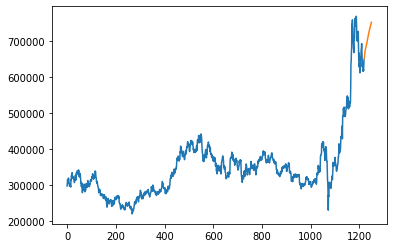

In [29]:
plt.plot(lg_c_r.index, lg_c_r['Close'])
plt.plot(forecast_ind, forecast_LSTM)